In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Read pharmacy data

poland_boundary = gpd.read_file("C:/Users/alkaye/geodemographics-demonstrator/data/poland.country.json")

hospitals = gpd.read_file("C:/Users/alkaye/geodemographics-demonstrator/data/poland_hospitals.geojson", columns=['id', 'name', 'geometry'])
nursing_home = gpd.read_file("C:/Users/alkaye/geodemographics-demonstrator/data/poland_nursing_home.geojson", columns=['id', 'name', 'geometry'])
worship = gpd.read_file("C:/Users/alkaye/geodemographics-demonstrator/data/poland_place_of_worship.geojson", columns=['id', 'name', 'geometry'])
schools = gpd.read_file("C:/Users/alkaye/geodemographics-demonstrator/data/poland_schools.geojson", columns=['id', 'name', 'geometry'])
universities = gpd.read_file("C:/Users/alkaye/geodemographics-demonstrator/data/poland_universities.geojson", columns=['id', 'name', 'geometry'])

hospitals['type'] = 'hospital'
nursing_home['type'] = 'nursing_home'
worship['type'] = 'place_of_worship'
schools['type'] = 'school'
universities['type'] = 'university'

gdf = pd.concat([hospitals, nursing_home, worship, schools, universities])

gdf = gpd.sjoin(gdf, poland_boundary, predicate='within')

gdf

,id,name_left,geometry,type,index_right,terc,name_right
8,node/280726068,Szpital Kliniczny Dzieciątka Jezus,POINT (21.00248 52.22584),hospital,0,00,POLSKA
19,node/342051367,Państwowy Szpital Kliniczny Dzieciątka Jezus,POINT (20.99778 52.22406),hospital,0,00,POLSKA
27,node/469499756,Niepubliczny Zakład Opieki Długoterminowej pw....,POINT (19.74911 53.50638),hospital,0,00,POLSKA
28,node/469985535,Szpital Zakonu Bonifratrów Świętego Jana Grandego,POINT (19.94519 50.04752),hospital,0,00,POLSKA
29,node/476214527,Poliklinika MSWiA,POINT (20.61829 52.87586),hospital,0,00,POLSKA
...,...,...,...,...,...,...,...
796,node/11901251799,Akademia Zamojska,POINT (23.25205 50.71842),university,0,00,POLSKA
798,node/11963451877,Aport,POINT (18.78143 53.02197),university,0,00,POLSKA
799,node/11963452146,Centrum Szkolenia Techniki Nurkowej Akwansuta,POINT (18.58489 53.00546),university,0,00,POLSKA
802,node/12010305518,Uniwersytet w Białymstoku - Wydział Filozofii,POINT (23.15494 53.13184),university,0,00,POLSKA


<Axes: >

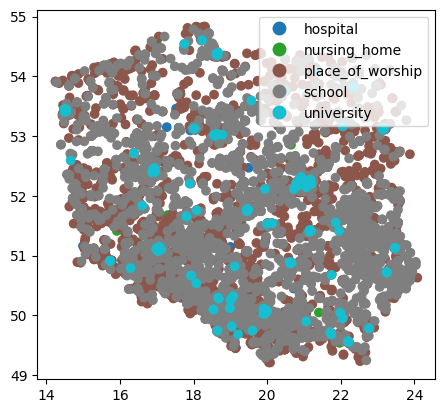

In [3]:
gdf.plot(column='type', legend=True)

In [4]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
gdf.to_file("C:/Users/alkaye/geodemographics-demonstrator/processed_data/osm_amenities.geojson")